In [1]:
#Loading dataset
import pandas as pd
import sys
sys.path.append(r"C:\Users\Ericd\OneDrive\Desktop\wudimoxing")
from wudi_regression import Regression
from wudi_classification import Classification
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from pickle import dump, load
import optuna
from colorama import Fore
from IPython.display import display

df = pd.read_excel('QAQ.xlsx')
df.to_csv('Wastewater treatment plant.csv', index=False)

``multivariate`` option is an experimental feature. The interface can change in the future.


In [2]:
file1_path = "Wastewater treatment plant.csv"
file2_path = "data_features_Class.csv"


df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)


# Concatenate the DataFrames horizontally (along columns)
combination = pd.concat([df1, df2], axis=1)

# Replace 'final.csv' with the desired name for the combined CSV file
combination.to_csv('CHANGE RATE(Class).csv', index=False)
df = pd.read_csv('CHANGE RATE(Class).csv')

In [3]:
df2

,Unnamed: 0,Sample ID,Sampling month average,Sampling month,SRTd,COD,NH4N,TP,Gammaproteobacteria,Bacteroidia,...,Vampirivibrionia,Desulfovibrionia,Negativicutes,Holophagae,Leptospirae,metagenome,Kapabacteria,Lineage IIb,Desulfobacteria,Hydrogenedentia
0,0,SAKR1,18.0,55.0,12.0,771.97,61.4,7.2,35.535156,22.441406,...,0.054688,0.082031,0.027344,0.058594,0.144531,0.757812,0.058594,0.257812,0.003906,0.101562
1,1,SAKR2,18.0,55.0,12.0,771.97,61.4,7.2,32.203125,23.753906,...,0.035156,0.101562,0.023438,0.105469,0.160156,0.941406,0.066406,0.214844,0.003906,0.085938
2,2,SAKR3,18.0,55.0,12.0,771.97,61.4,7.2,31.246094,24.363281,...,0.035156,0.054688,0.046875,0.054688,0.167969,0.917969,0.042969,0.246094,0.000000,0.101562
3,3,SAKR4,18.0,55.0,12.0,771.97,61.4,7.2,34.714844,23.082031,...,0.042969,0.062500,0.066406,0.078125,0.171875,0.812500,0.078125,0.222656,0.015625,0.101562
4,4,SAKR5,18.0,55.0,12.0,771.97,61.4,7.2,30.414062,24.949219,...,0.039062,0.054688,0.035156,0.058594,0.226562,0.902344,0.070312,0.265625,0.000000,0.121094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,1181,UYUM08,21.0,110.0,15.0,NaN,NaN,NaN,36.351562,18.453125,...,0.007812,0.042969,0.066406,0.078125,0.402344,0.039062,0.253906,0.019531,0.023438,0.136719
1182,1182,UYUM09,21.0,110.0,15.0,NaN,NaN,NaN,35.890625,17.445312,...,0.015625,0.031250,0.070312,0.097656,0.355469,0.023438,0.218750,0.019531,0.007812,0.105469
1183,1183,UYUM10,21.0,110.0,15.0,NaN,NaN,NaN,38.933594,18.968750,...,0.019531,0.031250,0.054688,0.105469,0.347656,0.046875,0.230469,0.050781,0.003906,0.156250
1184,1184,UYUM11,21.0,110.0,15.0,NaN,NaN,NaN,38.746094,20.468750,...,0.019531,0.054688,0.070312,0.089844,0.316406,0.031250,0.226562,0.031250,0.011719,0.113281


In [4]:
new_column_name = 'Aeration tank(HRT)'
df.rename(columns={'Aeration tank': new_column_name}, inplace=True)

new_column_name = 'Plant(HRT)'
df.rename(columns={'Plant': new_column_name}, inplace=True)

new_column_name = 'Annual average temperature (oC)'
df.rename(columns={'Annual average': new_column_name}, inplace=True)

new_column_name = 'Annual mean of daily maximum temperature (oC) '
df.rename(columns={'Annual mean of daily maximum': new_column_name}, inplace=True)

new_column_name = 'Annual mean of daily minimum temperature (oC) '
df.rename(columns={'Annual mean of daily minimum': new_column_name}, inplace=True)

new_column_name = 'Sampling month average temperature (oC)'
df.rename(columns={'Sampling month average': new_column_name}, inplace=True)

new_column_name = 'Annual mean of daily minimum temperature (oC) '
df.rename(columns={'Annual mean of daily minimum': new_column_name}, inplace=True)

new_column_name = 'Annual Precipitation(mm)'
df.rename(columns={'Annual': new_column_name}, inplace=True)

new_column_name = 'Sampling month Precipitation(mm)'
df.rename(columns={'Sampling month': new_column_name}, inplace=True)

new_column_name = 'Annual Precipitation(mm)'
df.rename(columns={'Annual': new_column_name}, inplace=True)

new_column_name = 'General AS process type'
df.rename(columns={'General type ': new_column_name}, inplace=True)

new_column_name = 'Detailed AS process type'
df.rename(columns={'Detailed type': new_column_name}, inplace=True)

new_column_name = 'Percentage of Industry wastewater source'
df.rename(columns={'Percentage': new_column_name}, inplace=True)

new_column_name = 'Contained in Inf? (Industry wastewater source)'
df.rename(columns={'Contained in Inf?': new_column_name}, inplace=True)

new_column_name = 'Others(Order)'
df.rename(columns={'Others.2': new_column_name}, inplace=True)

new_column_name = 'Others(Classs)'
df.rename(columns={'Others.1': new_column_name}, inplace=True)

new_column_name = 'Others(Phylum)'
df.rename(columns={'Others': new_column_name}, inplace=True)

new_column_name = 'Unclassified(Phylum)'
df.rename(columns={'Unclassified': new_column_name}, inplace=True)

new_column_name = 'Unclassified(Classs)'
df.rename(columns={'Unclassified.1': new_column_name}, inplace=True)

new_column_name = 'Unclassified(Order)'
df.rename(columns={'Unclassified.2': new_column_name}, inplace=True)



In [5]:
columns_to_drop = ['Sample ID', 'WWTP ID', 'SiteID', 'Site Name', 'Sampling Date',
        'Sampling moment','Actual Inf rate (m3/d)',
       'Nitrification', 'Denitrification','Aerator type', 'BOD (mg/l) inf/(1+recycle ratio)', 'BOD (mg/l) Aeration tank inf',
       'COD (mg/l) Inf/(1+recycle ratio)',
       'COD (mg/l) Aeration tank inf', 'F/M (kg BOD/kg MLSS-d)', 'NH4-N (mg/l) Aeration tank inf', 
        'TN (mg/l) Aeration tank inf','TP (mg/l) Aeration tank inf', 'Conductivity (μS/cm)','SRTd',
       'COD', 'NH4N', 'TP','NH4-N (mg/l)', 'NO3-N (mg/l)', 'SVI (ml/g)',
        'Sample ID.1' ,'Unnamed: 0','Sampling month average.1',
    'Sampling month.1']

df = df.drop(columns=columns_to_drop)

In [6]:
targets = df.columns.to_numpy()
targets = targets[0:]
print(targets)

['Latitude' 'Longitude' 'City Name' 'Country/Region' 'Continent'
 'Climate typea' 'Annual average temperature (oC)'
 'Annual mean of daily maximum temperature (oC) '
 'Annual mean of daily minimum temperature (oC) '
 'Sampling month average temperature (oC)' 'Annual Precipitation(mm)'
 'Sampling month Precipitation(mm)' 'GDP per capita (dollars)'
 'City population' 'Year of plant build' 'Designed capacity (m3/d)'
 'Volume of aeration tanks (m3)' 'Plant(HRT)' 'Aeration tank(HRT)'
 'SRT (d)' 'General AS process type' 'Detailed AS process type'
 'BOD (mg/l) Inf' 'BOD (mg/l) Eff' 'COD (mg/l) Inf' 'COD (mg/l) Eff'
 'NH4-N (mg/l) Inf' 'NH4-N (mg/l) Eff' 'TN (mg/l) Inf' 'TN (mg/l) Eff'
 'TP (mg/l) Inf' 'TP (mg/l) Eff'
 'Contained in Inf? (Industry wastewater source)'
 'Percentage of Industry wastewater source' 'MLSS (mg/l)' 'DO (mg/l)' 'pH'
 'Mixed liquid temperature (oC)' 'Gammaproteobacteria' 'Bacteroidia'
 'Unclassified(Phylum)' 'Alphaproteobacteria' 'Others(Phylum)'
 'Clostridia' 'Anaerol

In [7]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)  # 这里的 n_neighbors 可以根据你的需求进行调整

In [8]:
columns_to_extract = ['Latitude', 'Longitude', 
        'Annual average temperature (oC)',
       'Annual mean of daily maximum temperature (oC) ',
       'Annual mean of daily minimum temperature (oC) ',
       'Sampling month average temperature (oC)', 'Annual Precipitation(mm)',
       'Sampling month Precipitation(mm)', 'GDP per capita (dollars)',
       'City population', 'Year of plant build', 'Designed capacity (m3/d)',
       'Volume of aeration tanks (m3)', 'Plant(HRT)', 'Aeration tank(HRT)',
       'SRT (d)', 'BOD (mg/l) Inf', 'BOD (mg/l) Eff', 'COD (mg/l) Inf', 'COD (mg/l) Eff',
       'NH4-N (mg/l) Inf', 'NH4-N (mg/l) Eff', 'TN (mg/l) Inf',
       'TN (mg/l) Eff', 'TP (mg/l) Inf', 'TP (mg/l) Eff',
       'Percentage of Industry wastewater source', 'MLSS (mg/l)', 'DO (mg/l)',
       'pH', 'Mixed liquid temperature (oC)',
     'Gammaproteobacteria',
       'Bacteroidia', 'Unclassified(Phylum)', 'Alphaproteobacteria',
       'Others(Phylum)', 'Clostridia', 'Anaerolineae', 'Parcubacteria',
       'Polyangia', 'Planctomycetes', 'Verrucomicrobiae', 'Bdellovibrionia',
       'Chlamydiae', 'Oligoflexia', 'Phycisphaerae', 'Gracilibacteria',
       'Actinobacteria', 'Bacilli', 'Microgenomatia', 'Babeliae', 'ABY1',
       'Saccharimonadia', 'Acidimicrobiia', 'Omnitrophia', 'Cyanobacteriia',
       'Acidobacteriae', 'Myxococcia', 'Nanoarchaeia', 'Thermoleophilia',
       'Blastocatellia', 'OM190', 'Spirochaetia', 'Nitrospiria',
       'Chloroflexia', 'Kiritimatiellae', 'Ignavibacteria', 'Desulfuromonadia',
       'Campylobacteria', 'Gemmatimonadetes', 'Vicinamibacteria',
       'Fimbriimonadia', 'Vampirivibrionia', 'Desulfovibrionia',
       'Negativicutes', 'Holophagae', 'Leptospirae', 'metagenome',
       'Kapabacteria', 'Lineage IIb', 'Desulfobacteria', 'Hydrogenedentia']

In [9]:
df_1 = df[columns_to_extract]

In [10]:
data_types = df.dtypes

In [11]:

# Filter the columns that have the data type 'object'
object_columns = data_types[data_types == 'object'].index

# Display the list of columns with object data type
print("Columns with object data type:")
print(object_columns)

Columns with object data type:
Index(['City Name', 'Country/Region', 'Continent', 'Climate typea',
       'General AS process type', 'Detailed AS process type',
       'Contained in Inf? (Industry wastewater source)'],
      dtype='object')


In [12]:
df_filled = pd.DataFrame(imputer.fit_transform(df_1), columns=df_1.columns)

In [13]:
df.drop(columns = columns_to_extract)

,City Name,Country/Region,Continent,Climate typea,General AS process type,Detailed AS process type,Contained in Inf? (Industry wastewater source)
0,Cape Town,South Africa,Africa,Csb,A2O,UCT,Yes
1,Cape Town,South Africa,Africa,Csb,A2O,UCT,Yes
2,Cape Town,South Africa,Africa,Csb,A2O,UCT,Yes
3,Cape Town,South Africa,Africa,Csb,A2O,UCT,Yes
4,Cape Town,South Africa,Africa,Csb,A2O,UCT,Yes
...,...,...,...,...,...,...,...
1185,Uruguay,Uruguay,South America,Cfa,plug flow,Plug flow,NaN
1186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1188,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
columns_to_replace = ['Latitude', 'Longitude', 
        'Annual average temperature (oC)',
       'Annual mean of daily maximum temperature (oC) ',
       'Annual mean of daily minimum temperature (oC) ',
       'Sampling month average temperature (oC)', 'Annual Precipitation(mm)',
       'Sampling month Precipitation(mm)', 'GDP per capita (dollars)',
       'City population', 'Year of plant build', 'Designed capacity (m3/d)',
       'Volume of aeration tanks (m3)', 'Plant(HRT)', 'Aeration tank(HRT)',
       'SRT (d)', 'BOD (mg/l) Inf', 'BOD (mg/l) Eff', 'COD (mg/l) Inf', 'COD (mg/l) Eff',
       'NH4-N (mg/l) Inf', 'NH4-N (mg/l) Eff', 'TN (mg/l) Inf',
       'TN (mg/l) Eff', 'TP (mg/l) Inf', 'TP (mg/l) Eff',
       'Percentage of Industry wastewater source', 'MLSS (mg/l)', 'DO (mg/l)',
       'pH', 'Mixed liquid temperature (oC)', 
'Gammaproteobacteria',
       'Bacteroidia', 'Unclassified(Phylum)', 'Alphaproteobacteria',
       'Others(Phylum)', 'Clostridia', 'Anaerolineae', 'Parcubacteria',
       'Polyangia', 'Planctomycetes', 'Verrucomicrobiae', 'Bdellovibrionia',
       'Chlamydiae', 'Oligoflexia', 'Phycisphaerae', 'Gracilibacteria',
       'Actinobacteria', 'Bacilli', 'Microgenomatia', 'Babeliae', 'ABY1',
       'Saccharimonadia', 'Acidimicrobiia', 'Omnitrophia', 'Cyanobacteriia',
       'Acidobacteriae', 'Myxococcia', 'Nanoarchaeia', 'Thermoleophilia',
       'Blastocatellia', 'OM190', 'Spirochaetia', 'Nitrospiria',
       'Chloroflexia', 'Kiritimatiellae', 'Ignavibacteria', 'Desulfuromonadia',
       'Campylobacteria', 'Gemmatimonadetes', 'Vicinamibacteria',
       'Fimbriimonadia', 'Vampirivibrionia', 'Desulfovibrionia',
       'Negativicutes', 'Holophagae', 'Leptospirae', 'metagenome',
       'Kapabacteria', 'Lineage IIb', 'Desulfobacteria', 'Hydrogenedentia']

df[columns_to_replace] = df_filled[columns_to_replace].values


In [15]:
'''
#df['BOD(difference)'] = df['BOD (mg/l) Inf']- df['BOD (mg/l) Eff'] #regressor1
#df['COD(difference)'] = df['COD (mg/l) Inf']- df['COD (mg/l) Eff'] #regressor2
#df['NH4-N(difference)'] = df['NH4-N (mg/l) Inf']- df['NH4-N (mg/l) Eff'] #regressor3
#df['TN(difference)'] = df['TN (mg/l) Inf']- df['TN (mg/l) Eff'] #regressor4
#df['TP(difference)'] = df['TP (mg/l) Inf']- df['TP (mg/l) Eff'] #regressor5
'''
df['BOD(Percentage)'] = (df['BOD (mg/l) Inf']- df['BOD (mg/l) Eff'])/df['BOD (mg/l) Inf'] #regressor6
df['COD(Percentage)'] = (df['COD (mg/l) Inf']- df['COD (mg/l) Eff'])/df['COD (mg/l) Inf'] #regressor7
df['NH4-N(Percentage)'] = (df['NH4-N (mg/l) Inf']- df['NH4-N (mg/l) Eff'])/df['NH4-N (mg/l) Inf'] #regressor8
df['TN(Percentage)'] = (df['TN (mg/l) Inf']- df['TN (mg/l) Eff'])/df['TN (mg/l) Inf'] #regressor9
df['TP(Percentage)'] = (df['TP (mg/l) Inf']- df['TP (mg/l) Eff'])/df['TP (mg/l) Inf'] #regressor10


In [16]:
df.iloc

In [17]:
df.dropna(inplace=True)

In [18]:
df['Country/Region'] = df['Country/Region'].replace({'South Africa': 0, 'China': 1, 'Japan': 2, 'Singapore': 3, 'South Korea': 4, 'Taiwan (ROC)':5,'Australia':6,'New Zealand':7,'Austria':8,'Denmark':9,'Germany':10,'Italy':11,'Luxembourg':12,'Portugal':13,'Sweden':14,'Switzerland':15,'United Kindom':16,'Canada':17,'Mexico':18,'United States':19,'Brazil':20,'Chile':21,'Colombia':22,'Uruguay':23})
df['Continent'] = df['Continent'].replace({'Africa': 0, 'Asia': 1,'Australasia': 2,'Europe': 3,'North America': 4,'South America':5})
df['Climate typea'] = df['Climate typea'].replace({'Cfa': 0, 'Dwa': 1,'Dfb': 2,'Dfa': 3,'Cwa': 4,'Csa':5,'Csb':6,'Cfb':7,'Aw':8,'Af':9,'Cfc':10,'Cwb':11,'Dsc':12,'BWh':13,'Cwc':14,'Am':15,'ET':16})

In [19]:
'''# Make a copy of the DataFrame to preserve the original 'df'
df_sorted = df.copy()

# Sort the DataFrame copy 'df_sorted' by the 'Latitude' column in ascending order
df_sorted.sort_values(by='Latitude', inplace=True)

# Use the 'rank' method to assign ranks based on the sorted 'Latitude'
df_sorted['City Name'] = df_sorted['Latitude'].rank().astype(int) - 1

# Update the 'City Name' column in the original DataFrame 'df' with the ranks
df['City Name'] = df_sorted['City Name']

print(df['City Name'])'''

"# Make a copy of the DataFrame to preserve the original 'df'\ndf_sorted = df.copy()\n\n# Sort the DataFrame copy 'df_sorted' by the 'Latitude' column in ascending order\ndf_sorted.sort_values(by='Latitude', inplace=True)\n\n# Use the 'rank' method to assign ranks based on the sorted 'Latitude'\ndf_sorted['City Name'] = df_sorted['Latitude'].rank().astype(int) - 1\n\n# Update the 'City Name' column in the original DataFrame 'df' with the ranks\ndf['City Name'] = df_sorted['City Name']\n\nprint(df['City Name'])"

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_cities = label_encoder.fit_transform(df['City Name'])
df['City Name'] = encoded_cities
print(df[['City Name']])

      City Name
0            12
1            12
2            12
3            12
4            12
...         ...
1148         58
1149         58
1150         58
1154         11
1155         11

[789 rows x 1 columns]


In [21]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_cities = label_encoder.fit_transform(df['Detailed AS process type'])
df['Detailed AS process type'] = encoded_cities
print(df[['Detailed AS process type']])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_cities = label_encoder.fit_transform(df['General AS process type'])
df['General AS process type'] = encoded_cities
print(df[['General AS process type']])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_cities = label_encoder.fit_transform(df['Contained in Inf? (Industry wastewater source)'])
df['Contained in Inf? (Industry wastewater source)'] = encoded_cities
print(df[['Contained in Inf? (Industry wastewater source)']])




      Detailed AS process type
0                           40
1                           40
2                           40
3                           40
4                           40
...                        ...
1148                        10
1149                        10
1150                        10
1154                        36
1155                        36

[789 rows x 1 columns]
      General AS process type
0                           0
1                           0
2                           0
3                           0
4                           0
...                       ...
1148                        3
1149                        3
1150                        3
1154                        2
1155                        2

[789 rows x 1 columns]
      Contained in Inf? (Industry wastewater source)
0                                                  2
1                                                  2
2                                                  2
3       

In [22]:
data_types = df.dtypes

In [23]:
# Filter the columns that have the data type 'object'
object_columns = data_types[data_types == 'object'].index

# Display the list of columns with object data type
print("Columns with object data type:")
print(object_columns)

Columns with object data type:
Index([], dtype='object')


In [24]:
features_bodp = df.drop(['BOD (mg/l) Inf', 'BOD (mg/l) Eff', 'BOD(Percentage)',
       'COD(Percentage)', 'NH4-N(Percentage)', 'TN(Percentage)',
       'TP(Percentage)'], axis = 1)
labels_bodp = df['BOD(Percentage)']

features_codp = df.drop([ 'BOD(Percentage)',
       'COD(Percentage)', 'NH4-N(Percentage)', 'TN(Percentage)',
       'TP(Percentage)','COD (mg/l) Inf', 'COD (mg/l) Eff'], axis = 1)
labels_codp = df['COD(Percentage)']

features_nh4np = df.drop(['BOD(Percentage)',
       'COD(Percentage)', 'NH4-N(Percentage)', 'TN(Percentage)',
       'TP(Percentage)','NH4-N (mg/l) Inf', 'NH4-N (mg/l) Eff'], axis = 1)
labels_nh4np = df['NH4-N(Percentage)']

features_tnp = df.drop([  'BOD(Percentage)',
       'COD(Percentage)', 'NH4-N(Percentage)', 'TN(Percentage)',
       'TP(Percentage)','TN (mg/l) Inf',
       'TN (mg/l) Eff'], axis = 1)
labels_tnp = df['TN(Percentage)']

features_tpp = df.drop([ 'BOD(Percentage)',
       'COD(Percentage)', 'NH4-N(Percentage)', 'TN(Percentage)',
       'TP(Percentage)','TP (mg/l) Inf', 'TP (mg/l) Eff'], axis = 1)
labels_tpp = df['TP(Percentage)']


In [25]:
remaining_features = features_bodp.columns.tolist()

In [26]:
regressor6 = Regression(
    predictor=['all'], 
    exclude_models = ['ann', 'krr']
)
regressor6.fit(features_bodp, labels_bodp)


          
██████         ███     ██        ██ ████ ██████                ██████ █████   ████ ██████
██        ██ ██      ██  ██      ██    ██   ██        ██            ██         ██      █   ██   ██        
██        ██ ███████   ██    ██     ██   ██        ██  ████  ██████ █████     ██   ██        
██        ██ ██      ██    ██  ██      ██   ██        ██            ██         ██  █       ██   ██        
██████     ██      ██      ███      ████ ██████                ██████ ██    ██ ████ ██████

 

Start [ ✓ ]

Preprocessing Started [*]

Preprocessing Done [ ✓ ]

Training [*]

Training Done [ ✓ ]

Results Below



,Name,R2 Score,Mean Absolute Error,Root Mean Squared Error,KFold Accuracy,Model
0,Linear Regression,3.636836,0.031963,0.048757,20.239309,LinearRegression()
1,Stochastic Gradient Descent Regressor,8.239385,0.031734,0.047578,12.966019,SGDRegressor()
2,Elastic Net Regressor,-0.957469,0.034819,0.049906,-0.670812,ElasticNet()
3,Bayesian Ridge Regressor,12.590570,0.030627,0.046437,33.480369,BayesianRidge()
4,Support Vector Regressor,-149.712073,0.073347,0.078487,-111.915885,SVR()
5,K-Neighbors Regressor,22.423952,0.017093,0.043747,48.671630,KNeighborsRegressor()
6,Decision Trees Regressor,8.994046,0.010719,0.047382,20.152756,DecisionTreeRegressor()
7,Random Forest Regressor,83.282838,0.009817,0.020308,69.154499,"(DecisionTreeRegressor(max_features='auto', ra..."
8,Gradient Boost Regressor,86.072017,0.010640,0.018536,69.305561,([DecisionTreeRegressor(criterion='friedman_ms...
9,AdaBoost Regressor,53.282811,0.029713,0.033948,56.141997,"(DecisionTreeRegressor(max_depth=3, random_sta..."



Completed Run [ ✓ ]

Saved Best Model to lucifer_ml_info/best/regression/models/Catboost_Regressor_1711632576.pkl and its scaler to lucifer_ml_info/best/regression/scalers/Catboost_Regressor_Scaler_1711632576.pkl 

Time Elapsed :  61.48 seconds 



In [27]:
regressor7 = Regression(
    predictor=['all'], 
    exclude_models = ['ann', 'krr']
)
regressor7.fit(features_codp, labels_codp)


          
██████         ███     ██        ██ ████ ██████                ██████ █████   ████ ██████
██        ██ ██      ██  ██      ██    ██   ██        ██            ██         ██      █   ██   ██        
██        ██ ███████   ██    ██     ██   ██        ██  ████  ██████ █████     ██   ██        
██        ██ ██      ██    ██  ██      ██   ██        ██            ██         ██  █       ██   ██        
██████     ██      ██      ███      ████ ██████                ██████ ██    ██ ████ ██████

 

Start [ ✓ ]

Preprocessing Started [*]

Preprocessing Done [ ✓ ]

Training [*]

Training Done [ ✓ ]

Results Below



,Name,R2 Score,Mean Absolute Error,Root Mean Squared Error,KFold Accuracy,Model
0,Linear Regression,53.910829,0.051697,0.068528,32.022670,LinearRegression()
1,Stochastic Gradient Descent Regressor,50.812728,0.054490,0.070794,36.484014,SGDRegressor()
2,Elastic Net Regressor,-5.102698,0.083186,0.103484,-1.196273,ElasticNet()
3,Bayesian Ridge Regressor,53.803766,0.052025,0.068607,39.671029,BayesianRidge()
4,Support Vector Regressor,55.383749,0.058093,0.067424,25.963761,SVR()
5,K-Neighbors Regressor,62.594612,0.033683,0.061735,61.690062,KNeighborsRegressor()
6,Decision Trees Regressor,96.938696,0.004857,0.017661,71.331419,DecisionTreeRegressor()
7,Random Forest Regressor,92.839206,0.014657,0.027011,85.061446,"(DecisionTreeRegressor(max_features='auto', ra..."
8,Gradient Boost Regressor,95.064166,0.015767,0.022426,84.839321,([DecisionTreeRegressor(criterion='friedman_ms...
9,AdaBoost Regressor,71.911558,0.046995,0.053497,56.043895,"(DecisionTreeRegressor(max_depth=3, random_sta..."



Completed Run [ ✓ ]

Saved Best Model to lucifer_ml_info/best/regression/models/Extra_Trees_Regressor_1711632630.pkl and its scaler to lucifer_ml_info/best/regression/scalers/Extra_Trees_Regressor_Scaler_1711632630.pkl 

Time Elapsed :  53.50 seconds 



In [28]:
regressor8 = Regression(
    predictor=['all'], 
    exclude_models = ['ann', 'krr']
)
regressor8.fit(features_nh4np, labels_nh4np)


          
██████         ███     ██        ██ ████ ██████                ██████ █████   ████ ██████
██        ██ ██      ██  ██      ██    ██   ██        ██            ██         ██      █   ██   ██        
██        ██ ███████   ██    ██     ██   ██        ██  ████  ██████ █████     ██   ██        
██        ██ ██      ██    ██  ██      ██   ██        ██            ██         ██  █       ██   ██        
██████     ██      ██      ███      ████ ██████                ██████ ██    ██ ████ ██████

 

Start [ ✓ ]

Preprocessing Started [*]

Preprocessing Done [ ✓ ]

Training [*]

Training Done [ ✓ ]

Results Below



,Name,R2 Score,Mean Absolute Error,Root Mean Squared Error,KFold Accuracy,Model
0,Linear Regression,22.144214,0.145351,0.226215,41.684698,LinearRegression()
1,Stochastic Gradient Descent Regressor,24.304493,0.146430,0.223055,43.233464,SGDRegressor()
2,Elastic Net Regressor,-2.772058,0.173661,0.259904,-1.501386,ElasticNet()
3,Bayesian Ridge Regressor,27.346084,0.135640,0.218527,45.971715,BayesianRidge()
4,Support Vector Regressor,58.219952,0.078545,0.165715,81.440323,SVR()
5,K-Neighbors Regressor,48.234480,0.054148,0.184458,81.015968,KNeighborsRegressor()
6,Decision Trees Regressor,-28.840918,0.050052,0.291007,83.874892,DecisionTreeRegressor()
7,Random Forest Regressor,47.140559,0.046095,0.186396,87.514033,"(DecisionTreeRegressor(max_features='auto', ra..."
8,Gradient Boost Regressor,64.511842,0.045647,0.152728,91.075741,([DecisionTreeRegressor(criterion='friedman_ms...
9,AdaBoost Regressor,45.142437,0.118739,0.189887,77.267164,"(DecisionTreeRegressor(max_depth=3, random_sta..."



Completed Run [ ✓ ]

Saved Best Model to lucifer_ml_info/best/regression/models/Catboost_Regressor_1711632692.pkl and its scaler to lucifer_ml_info/best/regression/scalers/Catboost_Regressor_Scaler_1711632692.pkl 

Time Elapsed :  61.90 seconds 



In [29]:
regressor9 = Regression(
    predictor=['all'], 
    exclude_models = ['ann', 'krr']
)
regressor9.fit(features_tnp, labels_tnp)


          
██████         ███     ██        ██ ████ ██████                ██████ █████   ████ ██████
██        ██ ██      ██  ██      ██    ██   ██        ██            ██         ██      █   ██   ██        
██        ██ ███████   ██    ██     ██   ██        ██  ████  ██████ █████     ██   ██        
██        ██ ██      ██    ██  ██      ██   ██        ██            ██         ██  █       ██   ██        
██████     ██      ██      ███      ████ ██████                ██████ ██    ██ ████ ██████

 

Start [ ✓ ]

Preprocessing Started [*]

Preprocessing Done [ ✓ ]

Training [*]

Training Done [ ✓ ]

Results Below



,Name,R2 Score,Mean Absolute Error,Root Mean Squared Error,KFold Accuracy,Model
0,Linear Regression,-5854.596431,0.789638,1.058341,-3586.603450,LinearRegression()
1,Stochastic Gradient Descent Regressor,-5396.217359,0.761630,1.016790,-2851.292690,SGDRegressor()
2,Elastic Net Regressor,-101.460069,0.176169,0.194668,-52.471035,ElasticNet()
3,Bayesian Ridge Regressor,-2842.312672,0.551683,0.743950,-1366.331906,BayesianRidge()
4,Support Vector Regressor,63.450662,0.071576,0.082916,51.087817,SVR()
5,K-Neighbors Regressor,-4274.653176,0.142705,0.907133,-2660.535515,KNeighborsRegressor()
6,Decision Trees Regressor,69.642162,0.016558,0.075567,-4412.536821,DecisionTreeRegressor()
7,Random Forest Regressor,-850.068542,0.102251,0.422743,-744.011329,"(DecisionTreeRegressor(max_features='auto', ra..."
8,Gradient Boost Regressor,-492.379144,0.058195,0.333810,-232.833103,([DecisionTreeRegressor(criterion='friedman_ms...
9,AdaBoost Regressor,37.752174,0.079525,0.108209,52.091554,"(DecisionTreeRegressor(max_depth=3, random_sta..."



Completed Run [ ✓ ]

Saved Best Model to lucifer_ml_info/best/regression/models/AdaBoost_Regressor_1711632746.pkl and its scaler to lucifer_ml_info/best/regression/scalers/AdaBoost_Regressor_Scaler_1711632746.pkl 

Time Elapsed :  54.60 seconds 



In [30]:
regressor10 = Regression(
    predictor=['all'], 
    exclude_models = ['ann', 'krr']
)
regressor10.fit(features_tpp, labels_tpp)


          
██████         ███     ██        ██ ████ ██████                ██████ █████   ████ ██████
██        ██ ██      ██  ██      ██    ██   ██        ██            ██         ██      █   ██   ██        
██        ██ ███████   ██    ██     ██   ██        ██  ████  ██████ █████     ██   ██        
██        ██ ██      ██    ██  ██      ██   ██        ██            ██         ██  █       ██   ██        
██████     ██      ██      ███      ████ ██████                ██████ ██    ██ ████ ██████

 

Start [ ✓ ]

Preprocessing Started [*]

Preprocessing Done [ ✓ ]

Training [*]

Training Done [ ✓ ]

Results Below



,Name,R2 Score,Mean Absolute Error,Root Mean Squared Error,KFold Accuracy,Model
0,Linear Regression,30.924611,0.146807,0.217876,20.924953,LinearRegression()
1,Stochastic Gradient Descent Regressor,35.176677,0.134646,0.211063,32.619389,SGDRegressor()
2,Elastic Net Regressor,-0.747288,0.160394,0.263126,-1.131554,ElasticNet()
3,Bayesian Ridge Regressor,39.499365,0.132485,0.203905,36.730539,BayesianRidge()
4,Support Vector Regressor,75.571587,0.088640,0.129567,65.447846,SVR()
5,K-Neighbors Regressor,65.362178,0.075043,0.154284,49.562824,KNeighborsRegressor()
6,Decision Trees Regressor,98.844853,0.006400,0.028175,78.041058,DecisionTreeRegressor()
7,Random Forest Regressor,90.606374,0.042296,0.080346,82.652987,"(DecisionTreeRegressor(max_features='auto', ra..."
8,Gradient Boost Regressor,92.088758,0.049084,0.073734,80.246437,([DecisionTreeRegressor(criterion='friedman_ms...
9,AdaBoost Regressor,69.600085,0.121494,0.144538,43.736277,"(DecisionTreeRegressor(max_depth=3, random_sta..."



Completed Run [ ✓ ]

Saved Best Model to lucifer_ml_info/best/regression/models/Catboost_Regressor_1711632801.pkl and its scaler to lucifer_ml_info/best/regression/scalers/Catboost_Regressor_Scaler_1711632801.pkl 

Time Elapsed :  54.45 seconds 



In [35]:
df.columns

Index(['Latitude', 'Longitude', 'City Name', 'Country/Region', 'Continent',
       'Climate typea', 'Annual average temperature (oC)',
       'Annual mean of daily maximum temperature (oC) ',
       'Annual mean of daily minimum temperature (oC) ',
       'Sampling month average temperature (oC)', 'Annual Precipitation(mm)',
       'Sampling month Precipitation(mm)', 'GDP per capita (dollars)',
       'City population', 'Year of plant build', 'Designed capacity (m3/d)',
       'Volume of aeration tanks (m3)', 'Plant(HRT)', 'Aeration tank(HRT)',
       'SRT (d)', 'General AS process type', 'Detailed AS process type',
       'BOD (mg/l) Inf', 'BOD (mg/l) Eff', 'COD (mg/l) Inf', 'COD (mg/l) Eff',
       'NH4-N (mg/l) Inf', 'NH4-N (mg/l) Eff', 'TN (mg/l) Inf',
       'TN (mg/l) Eff', 'TP (mg/l) Inf', 'TP (mg/l) Eff',
       'Contained in Inf? (Industry wastewater source)',
       'Percentage of Industry wastewater source', 'MLSS (mg/l)', 'DO (mg/l)',
       'pH', 'Mixed liquid temperature 

In [36]:
environmental_keywords = ['Latitude', 'Longitude', 'City Name', 'Country/Region', 'Continent',
       'Climate typea', 'Annual average temperature (oC)',
       'Annual mean of daily maximum temperature (oC) ',
       'Annual mean of daily minimum temperature (oC) ',
       'Sampling month average temperature (oC)', 'Annual Precipitation(mm)',
       'Sampling month Precipitation(mm)', 'GDP per capita (dollars)',
       'City population', 'Year of plant build']

environmental_keywords = np.array(environmental_keywords)

operational_keywords = ['Designed capacity (m3/d)',
       'Volume of aeration tanks (m3)', 'Plant(HRT)', 'Aeration tank(HRT)',
       'SRT (d)', 'General AS process type', 'Detailed AS process type', 'Contained in Inf? (Industry wastewater source)',
       'Percentage of Industry wastewater source', 'MLSS (mg/l)', 'DO (mg/l)', 'pH', 'Mixed liquid temperature (oC)']

operational_keywords = np.array(operational_keywords)




chemical_keywords = ['COD (mg/l) Inf', 'COD (mg/l) Eff',
       'NH4-N (mg/l) Inf', 'NH4-N (mg/l) Eff', 'TN (mg/l) Inf',
       'TN (mg/l) Eff', 'TP (mg/l) Inf', 'TP (mg/l) Eff']

chemical_keywords = np.array(chemical_keywords)

chemical_keywords_1 = ['BOD (mg/l) Inf', 'BOD (mg/l) Eff',
       'NH4-N (mg/l) Inf', 'NH4-N (mg/l) Eff', 'TN (mg/l) Inf',
       'TN (mg/l) Eff', 'TP (mg/l) Inf', 'TP (mg/l) Eff']

chemical_keywords_1 = np.array(chemical_keywords_1)

chemical_keywords_2 = ['BOD (mg/l) Inf', 'BOD (mg/l) Eff','COD (mg/l) Inf', 'COD (mg/l) Eff',
       'TN (mg/l) Inf',
       'TN (mg/l) Eff', 'TP (mg/l) Inf', 'TP (mg/l) Eff']

chemical_keywords_2 = np.array(chemical_keywords_2)

chemical_keywords_3 = ['BOD (mg/l) Inf', 'BOD (mg/l) Eff','COD (mg/l) Inf', 'COD (mg/l) Eff',
       'NH4-N (mg/l) Inf', 'NH4-N (mg/l) Eff',  'TP (mg/l) Inf', 'TP (mg/l) Eff']

chemical_keywords_3 = np.array(chemical_keywords_3)

chemical_keywords_4 = ['BOD (mg/l) Inf', 'BOD (mg/l) Eff','COD (mg/l) Inf', 'COD (mg/l) Eff',
       'NH4-N (mg/l) Inf', 'NH4-N (mg/l) Eff', 'TN (mg/l) Inf',
       'TN (mg/l) Eff', ]

chemical_keywords_4 = np.array(chemical_keywords_4)



biological_keywords = ['Gammaproteobacteria',
       'Bacteroidia', 'Unclassified(Phylum)', 'Alphaproteobacteria',
       'Others(Phylum)', 'Clostridia', 'Anaerolineae', 'Parcubacteria',
       'Polyangia', 'Planctomycetes', 'Verrucomicrobiae', 'Bdellovibrionia',
       'Chlamydiae', 'Oligoflexia', 'Phycisphaerae', 'Gracilibacteria',
       'Actinobacteria', 'Bacilli', 'Microgenomatia', 'Babeliae', 'ABY1',
       'Saccharimonadia', 'Acidimicrobiia', 'Omnitrophia', 'Cyanobacteriia',
       'Acidobacteriae', 'Myxococcia', 'Nanoarchaeia', 'Thermoleophilia',
       'Blastocatellia', 'OM190', 'Spirochaetia', 'Nitrospiria',
       'Chloroflexia', 'Kiritimatiellae', 'Ignavibacteria', 'Desulfuromonadia',
       'Campylobacteria', 'Gemmatimonadetes', 'Vicinamibacteria',
       'Fimbriimonadia', 'Vampirivibrionia', 'Desulfovibrionia',
       'Negativicutes', 'Holophagae', 'Leptospirae', 'metagenome',
       'Kapabacteria', 'Lineage IIb', 'Desulfobacteria', 'Hydrogenedentia',
]

biological_keywords = np.array(biological_keywords)

cate = [environmental_keywords,operational_keywords,chemical_keywords,biological_keywords]

In [37]:
features_bodp.columns

Index(['Latitude', 'Longitude', 'City Name', 'Country/Region', 'Continent',
       'Climate typea', 'Annual average temperature (oC)',
       'Annual mean of daily maximum temperature (oC) ',
       'Annual mean of daily minimum temperature (oC) ',
       'Sampling month average temperature (oC)', 'Annual Precipitation(mm)',
       'Sampling month Precipitation(mm)', 'GDP per capita (dollars)',
       'City population', 'Year of plant build', 'Designed capacity (m3/d)',
       'Volume of aeration tanks (m3)', 'Plant(HRT)', 'Aeration tank(HRT)',
       'SRT (d)', 'General AS process type', 'Detailed AS process type',
       'COD (mg/l) Inf', 'COD (mg/l) Eff', 'NH4-N (mg/l) Inf',
       'NH4-N (mg/l) Eff', 'TN (mg/l) Inf', 'TN (mg/l) Eff', 'TP (mg/l) Inf',
       'TP (mg/l) Eff', 'Contained in Inf? (Industry wastewater source)',
       'Percentage of Industry wastewater source', 'MLSS (mg/l)', 'DO (mg/l)',
       'pH', 'Mixed liquid temperature (oC)', 'Gammaproteobacteria',
       'Bacte

In [38]:
perm_importance_mean, sorted_idx = regressor6.cate_features(True)

In [39]:
'''environmental = [np.where(features_bodp.columns[sorted_idx] == col)[0][0] for col in environmental_keywords]
environmental = np.sort(environmental)
environmental
perm_sorted = perm_importance_mean[environmental]
perm_sorted = np.sort(perm_sorted)
features_columns = features_bodp.columns[sorted_idx]
plt.barh(
        features_columns[environmental], perm_sorted
        )
plt.xlabel("Feature Importance: Environmental Factors")


operational= [np.where(features_bodp.columns[sorted_idx] == col)[0][0] for col in operational_keywords]
operational = np.sort(operational)
operational

perm_sorted = perm_importance_mean[operational]
perm_sorted = np.sort(perm_sorted)

features_columns = features_bodp.columns[sorted_idx]

plt.barh(
        features_columns[operational], perm_sorted
        )
plt.xlabel("Feature Importance: Operational Factors")


chemical = [np.where(features_bodp.columns[sorted_idx] == col)[0][0] for col in chemical_keywords]
chemical = np.sort(chemical)
operational

perm_sorted = perm_importance_mean[chemical]
perm_sorted = np.sort(perm_sorted)

features_columns = features_bodp.columns[sorted_idx]

plt.barh(
        features_columns[chemical], perm_sorted
        )
plt.xlabel("Feature Importance: chemical Factors")

biological = [np.where(features_bodp.columns[sorted_idx] == col)[0][0] for col in biological_keywords]
biological = np.sort(biological)
operational

perm_sorted = perm_importance_mean[biological]
perm_sorted = np.sort(perm_sorted)

features_columns = features_bodp.columns[sorted_idx]
num_features_to_show = 20
plt.barh(
    features_columns[biological][-num_features_to_show:], perm_sorted[-num_features_to_show:]
)
plt.xlabel("Feature Importance: biological Factors")
plt.show()'''

'environmental = [np.where(features_bodp.columns[sorted_idx] == col)[0][0] for col in environmental_keywords]\nenvironmental = np.sort(environmental)\nenvironmental\nperm_sorted = perm_importance_mean[environmental]\nperm_sorted = np.sort(perm_sorted)\nfeatures_columns = features_bodp.columns[sorted_idx]\nplt.barh(\n        features_columns[environmental], perm_sorted\n        )\nplt.xlabel("Feature Importance: Environmental Factors")\n\n\noperational= [np.where(features_bodp.columns[sorted_idx] == col)[0][0] for col in operational_keywords]\noperational = np.sort(operational)\noperational\n\nperm_sorted = perm_importance_mean[operational]\nperm_sorted = np.sort(perm_sorted)\n\nfeatures_columns = features_bodp.columns[sorted_idx]\n\nplt.barh(\n        features_columns[operational], perm_sorted\n        )\nplt.xlabel("Feature Importance: Operational Factors")\n\n\nchemical = [np.where(features_bodp.columns[sorted_idx] == col)[0][0] for col in chemical_keywords]\nchemical = np.sort(chemi

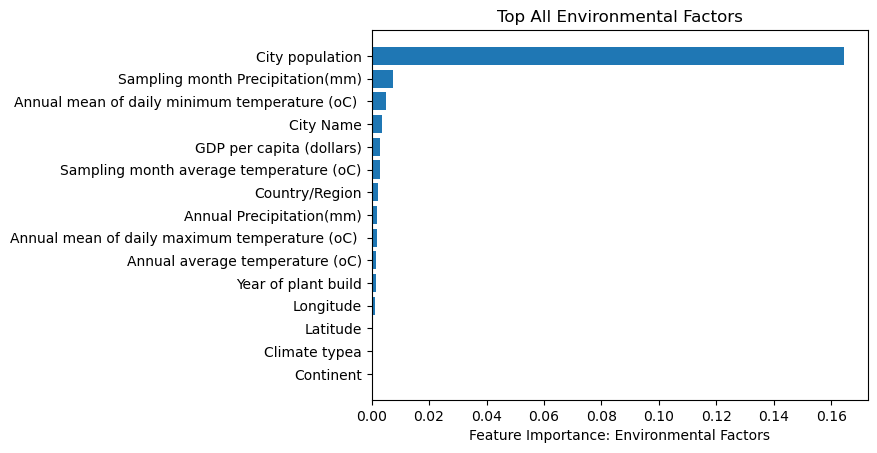

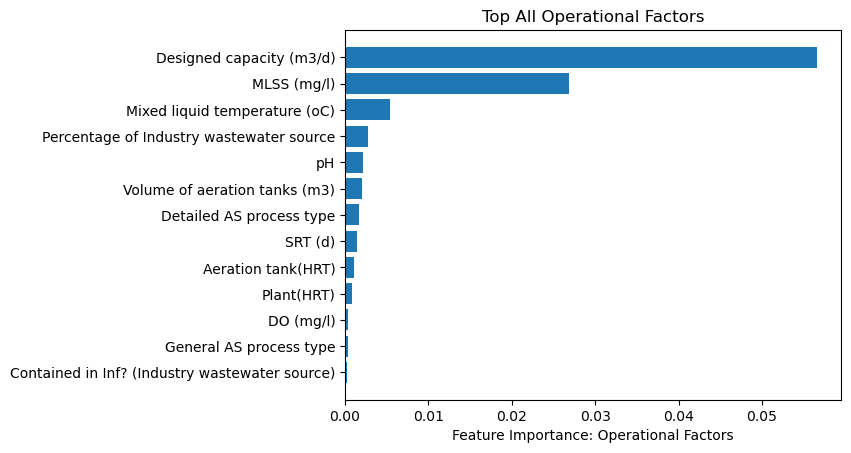

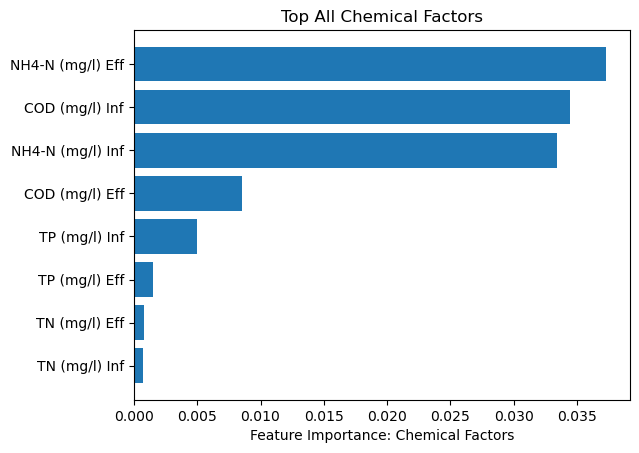

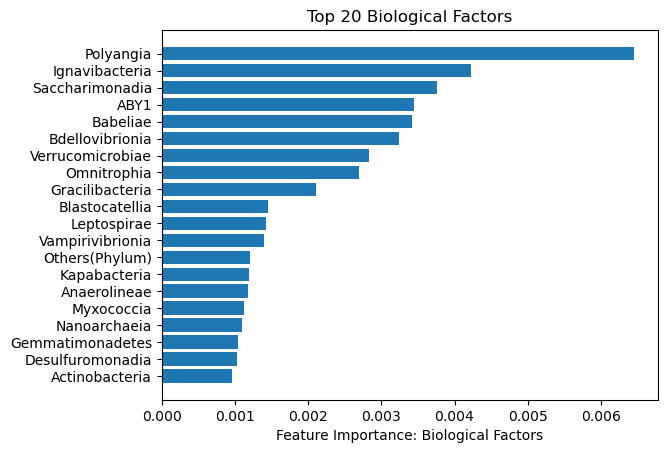

In [40]:
factor_types = ['Environmental', 'Operational', 'Chemical', 'Biological']
factor_keywords = [environmental_keywords, operational_keywords, chemical_keywords, biological_keywords]

# Define the number of features to show for biological factors
num_features_to_show = 20

# Iterate through each factor type and plot the corresponding feature importance
for factor_type, keywords in zip(factor_types, factor_keywords):
    indices = [np.where(features_bodp.columns[sorted_idx] == col)[0][0] for col in keywords]
    indices = np.sort(indices)

    perm_sorted = perm_importance_mean[indices]
    perm_sorted = np.sort(perm_sorted)

    features_columns = features_bodp.columns[sorted_idx]

    if factor_type == 'Biological':
        plt.barh(
            features_columns[indices][-num_features_to_show:], perm_sorted[-num_features_to_show:]
        )
    else:
        plt.barh(
            features_columns[indices], perm_sorted
        )

    plt.xlabel(f"Feature Importance: {factor_type} Factors")
    plt.title(f"Top {num_features_to_show if factor_type == 'Biological' else 'All'} {factor_type} Factors")
    plt.show()

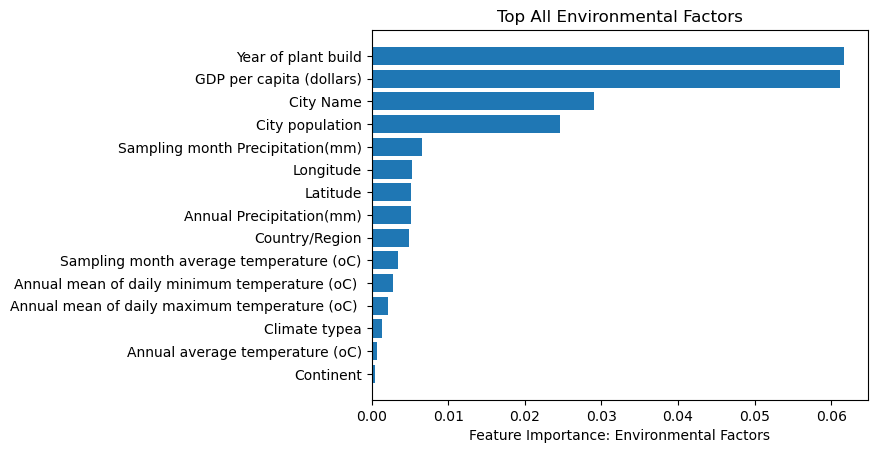

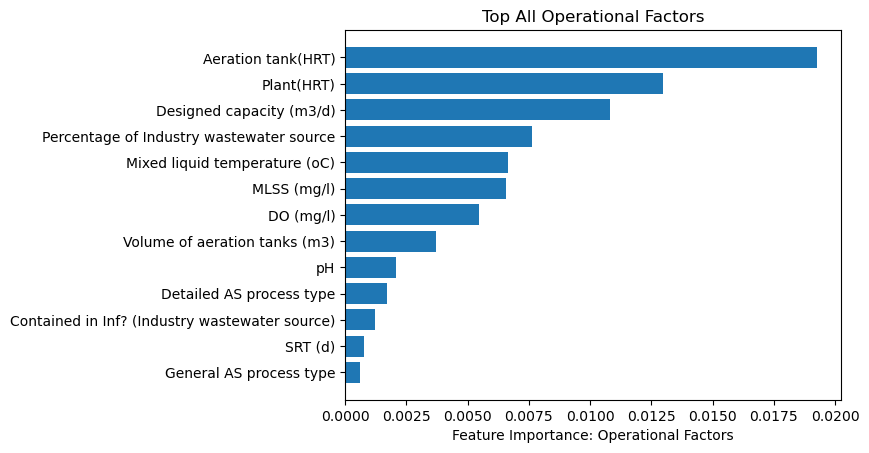

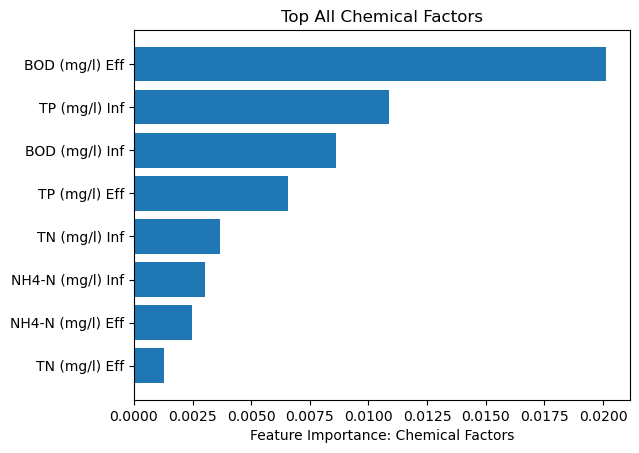

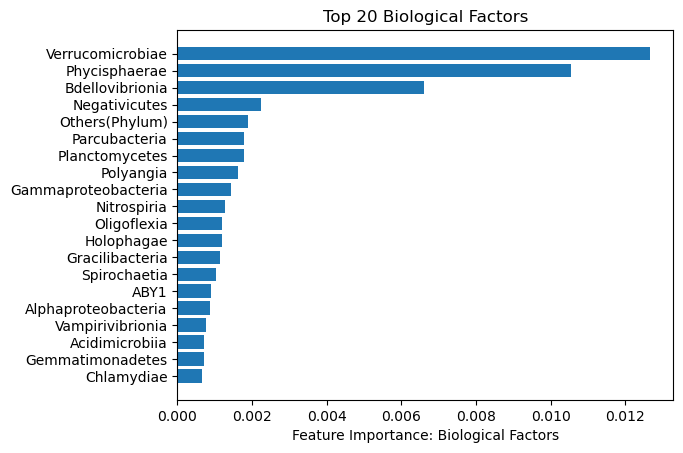

In [41]:
cate = [environmental_keywords,operational_keywords,chemical_keywords_1,biological_keywords]

perm_importance_mean, sorted_idx = regressor7.cate_features(True)

# Define the factor types and corresponding keywords
factor_types = ['Environmental', 'Operational', 'Chemical', 'Biological']
factor_keywords = [environmental_keywords, operational_keywords, chemical_keywords_1, biological_keywords]

# Define the number of features to show for biological factors
num_features_to_show = 20

# Iterate through each factor type and plot the corresponding feature importance
for factor_type, keywords in zip(factor_types, factor_keywords):
    indices = [np.where(features_codp.columns[sorted_idx] == col)[0][0] for col in keywords]
    indices = np.sort(indices)

    perm_sorted = perm_importance_mean[indices]
    perm_sorted = np.sort(perm_sorted)

    features_columns = features_codp.columns[sorted_idx]

    if factor_type == 'Biological':
        plt.barh(
            features_columns[indices][-num_features_to_show:], perm_sorted[-num_features_to_show:]
        )
    else:
        plt.barh(
            features_columns[indices], perm_sorted
        )

    plt.xlabel(f"Feature Importance: {factor_type} Factors")
    plt.title(f"Top {num_features_to_show if factor_type == 'Biological' else 'All'} {factor_type} Factors")
    plt.show()

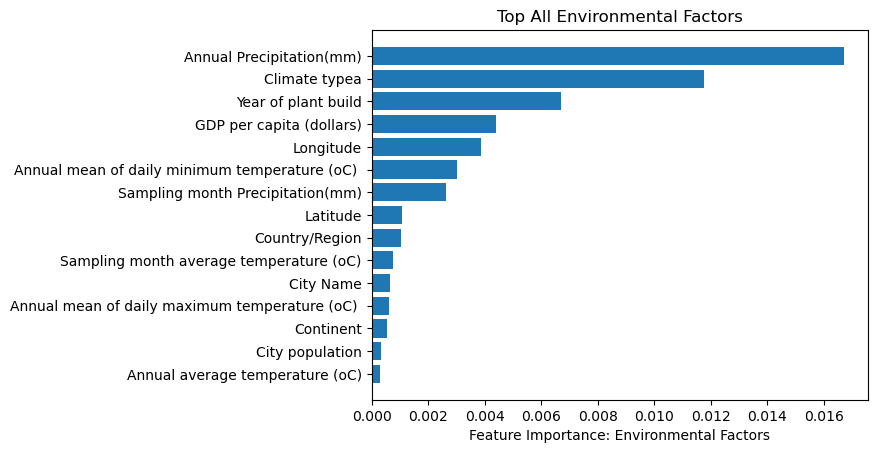

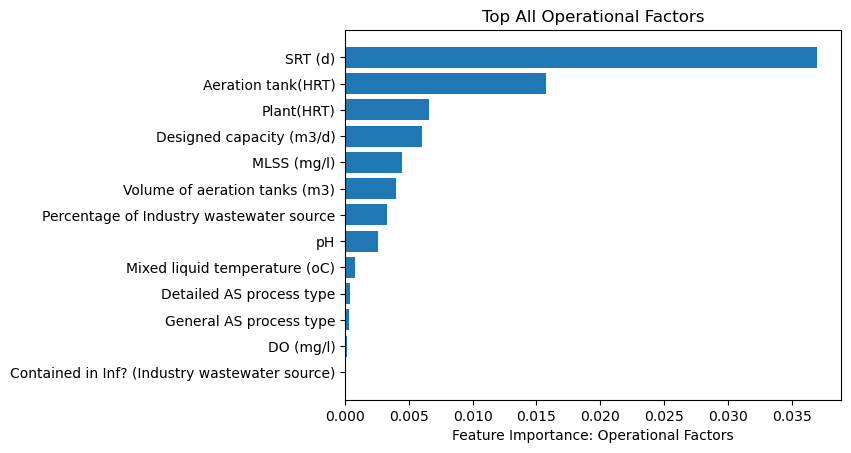

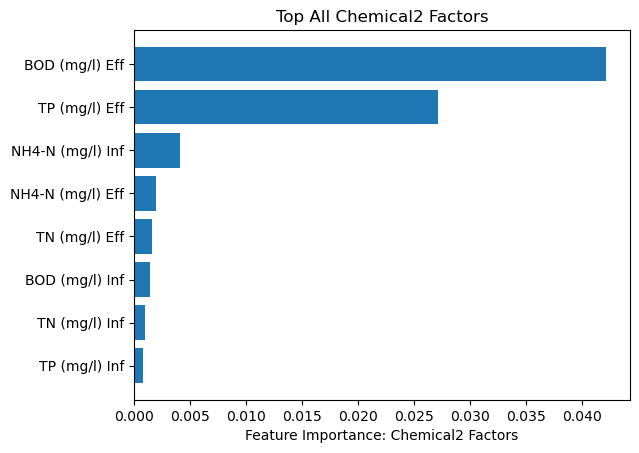

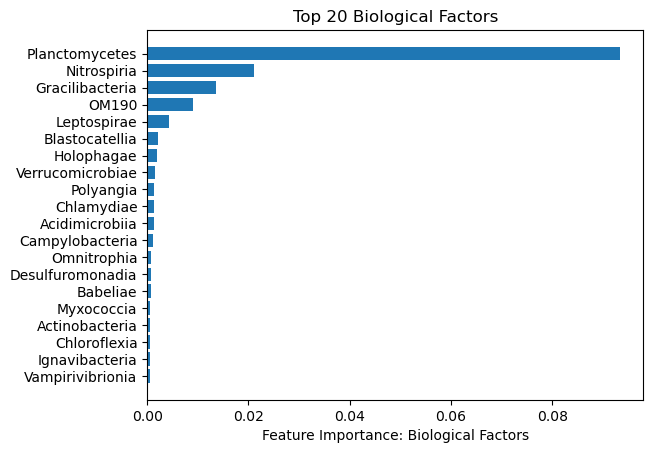

In [42]:
cate = [environmental_keywords,operational_keywords,chemical_keywords_2,biological_keywords]

perm_importance_mean, sorted_idx = regressor8.cate_features(True)

# Define the factor types and corresponding keywords
factor_types = ['Environmental', 'Operational', 'Chemical2', 'Biological']
factor_keywords = [environmental_keywords, operational_keywords, chemical_keywords_2, biological_keywords]

# Define the number of features to show for biological factors
num_features_to_show = 20

# Iterate through each factor type and plot the corresponding feature importance
for factor_type, keywords in zip(factor_types, factor_keywords):
    indices = [np.where(features_nh4np.columns[sorted_idx] == col)[0][0] for col in keywords]
    indices = np.sort(indices)

    perm_sorted = perm_importance_mean[indices]
    perm_sorted = np.sort(perm_sorted)

    features_columns = features_codp.columns[sorted_idx]

    if factor_type == 'Biological':
        plt.barh(
            features_columns[indices][-num_features_to_show:], perm_sorted[-num_features_to_show:]
        )
    else:
        plt.barh(
            features_columns[indices], perm_sorted
        )

    plt.xlabel(f"Feature Importance: {factor_type} Factors")
    plt.title(f"Top {num_features_to_show if factor_type == 'Biological' else 'All'} {factor_type} Factors")
    plt.show()

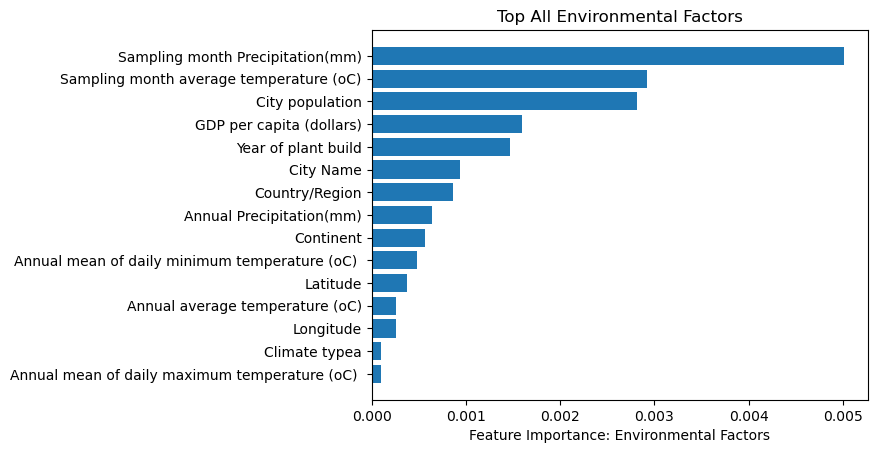

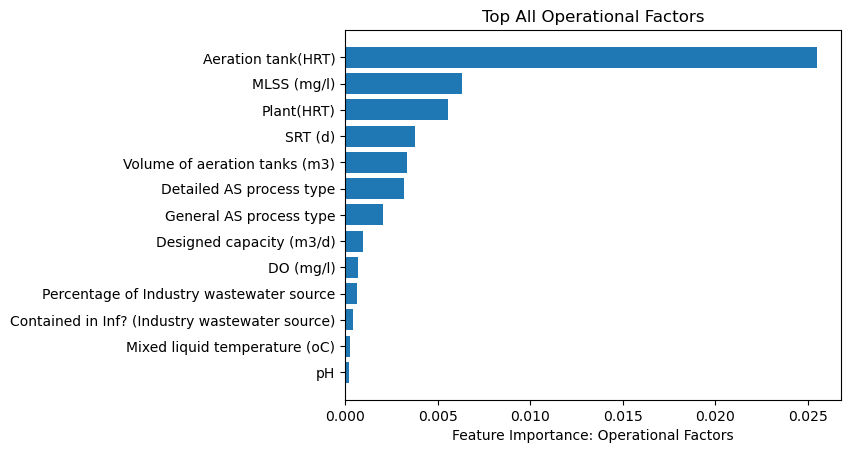

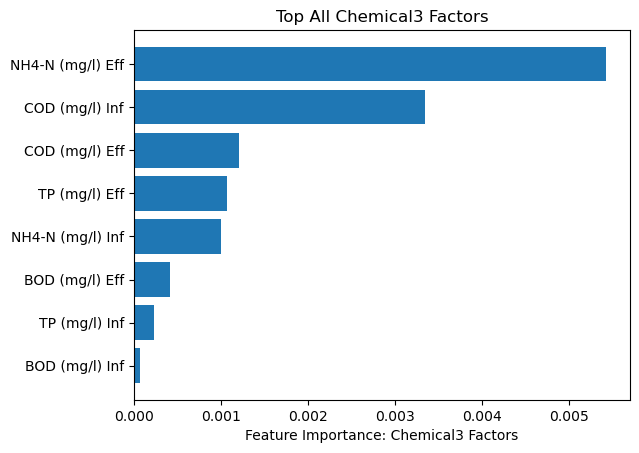

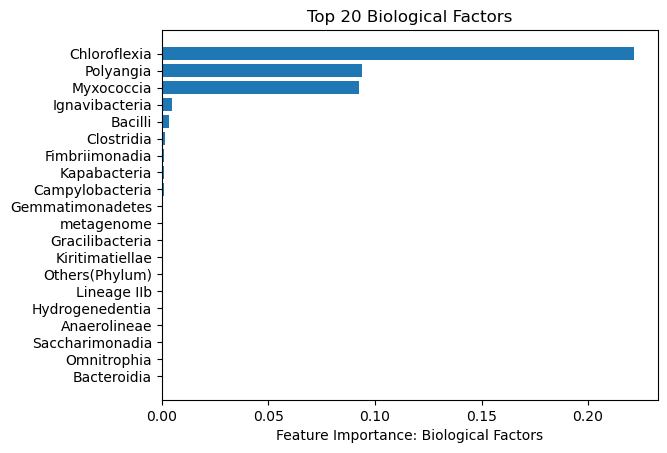

In [43]:
cate = [environmental_keywords,operational_keywords,chemical_keywords_3,biological_keywords]

perm_importance_mean, sorted_idx = regressor9.cate_features(True)

# Define the factor types and corresponding keywords
factor_types = ['Environmental', 'Operational', 'Chemical3', 'Biological']
factor_keywords = [environmental_keywords, operational_keywords, chemical_keywords_3, biological_keywords]

# Define the number of features to show for biological factors
num_features_to_show = 20

# Iterate through each factor type and plot the corresponding feature importance
for factor_type, keywords in zip(factor_types, factor_keywords):
    indices = [np.where(features_tnp.columns[sorted_idx] == col)[0][0] for col in keywords]
    indices = np.sort(indices)

    perm_sorted = perm_importance_mean[indices]
    perm_sorted = np.sort(perm_sorted)

    features_columns = features_tnp.columns[sorted_idx]

    if factor_type == 'Biological':
        plt.barh(
            features_columns[indices][-num_features_to_show:], perm_sorted[-num_features_to_show:]
        )
    else:
        plt.barh(
            features_columns[indices], perm_sorted
        )

    plt.xlabel(f"Feature Importance: {factor_type} Factors")
    plt.title(f"Top {num_features_to_show if factor_type == 'Biological' else 'All'} {factor_type} Factors")
    plt.show()

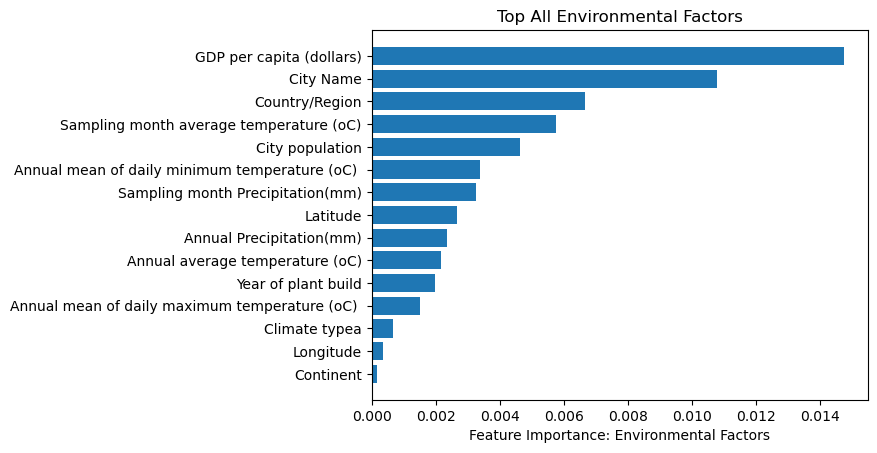

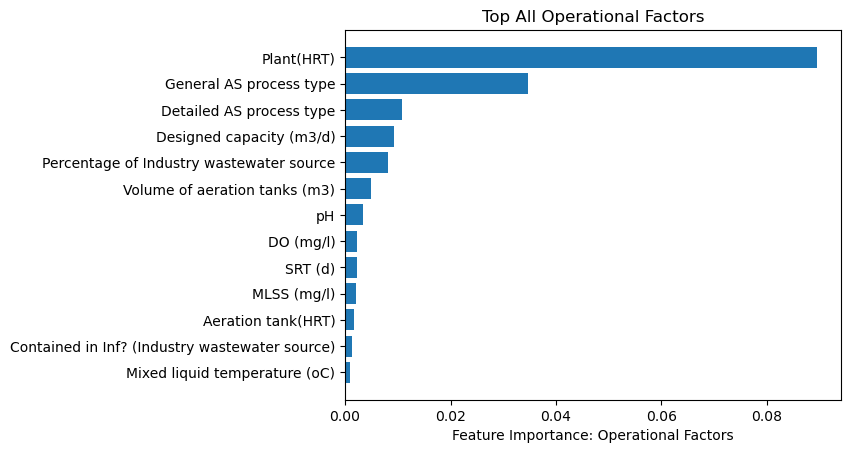

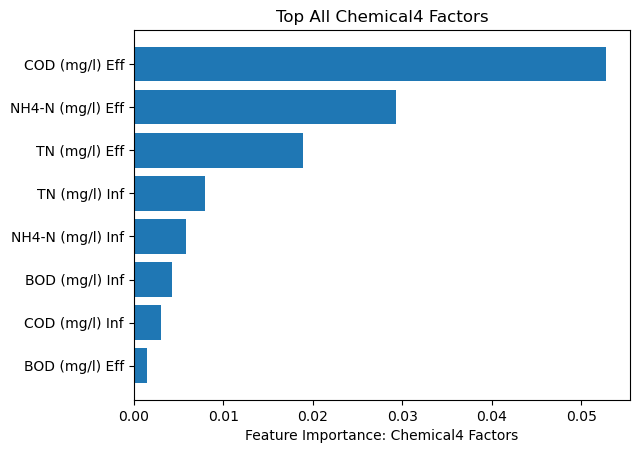

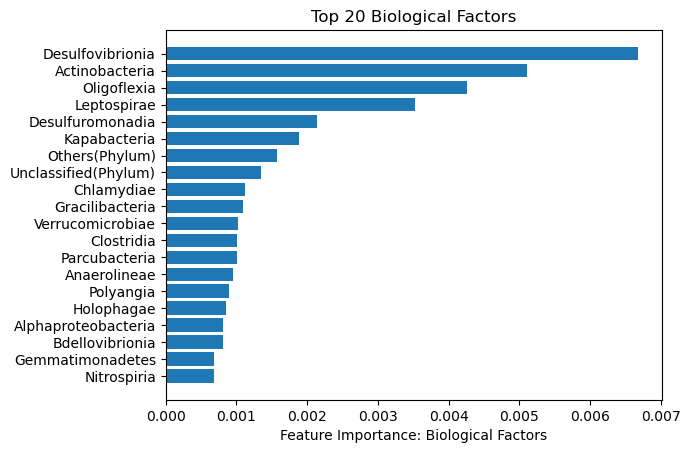

In [44]:
cate = [environmental_keywords,operational_keywords,chemical_keywords_4,biological_keywords]

perm_importance_mean, sorted_idx = regressor10.cate_features(True)

# Define the factor types and corresponding keywords
factor_types = ['Environmental', 'Operational', 'Chemical4', 'Biological']
factor_keywords = [environmental_keywords, operational_keywords, chemical_keywords_4, biological_keywords]

# Define the number of features to show for biological factors
num_features_to_show = 20

# Iterate through each factor type and plot the corresponding feature importance
for factor_type, keywords in zip(factor_types, factor_keywords):
    indices = [np.where(features_tpp.columns[sorted_idx] == col)[0][0] for col in keywords]
    indices = np.sort(indices)

    perm_sorted = perm_importance_mean[indices]
    perm_sorted = np.sort(perm_sorted)

    features_columns = features_tpp.columns[sorted_idx]

    if factor_type == 'Biological':
        plt.barh(
            features_columns[indices][-num_features_to_show:], perm_sorted[-num_features_to_show:]
        )
    else:
        plt.barh(
            features_columns[indices], perm_sorted
        )

    plt.xlabel(f"Feature Importance: {factor_type} Factors")
    plt.title(f"Top {num_features_to_show if factor_type == 'Biological' else 'All'} {factor_type} Factors")
    plt.show()